In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import math
iris=load_iris()

# You have two features and two classifications
data_0, data_1 = iris.data[:,1:3][:50], iris.data[:,1:3][50:100]
data = iris.data[:,1:3][:100]

mean_0 = np.asarray(np.mean(data_0,axis = 0)).reshape(2,1)
mean_1 = np.asarray(np.mean(data_1,axis = 0)).reshape(2,1)
mean =  np.asarray(np.mean(data,axis = 0)).reshape(2,1)
data_0 = np.asarray(data_0).T
data_1 = np.asarray(data_1).T
data = np.asarray(data).T
cov = (data-mean)@(data-mean).T/100
cov_0 = (data_0-mean_0)@(data_0-mean_0).T/50
cov_1 = (data_1-mean_1)@(data_1-mean_1).T/50
# TODO: Compute the mean and covariance of each cluster, and use these to find a QDA Boundary
# TODO: Compute the mean and covariance of the entire dataset, and use these to find a LDA Boundary
# TODO: Make two scatterplots of the data, one showing the QDA Boundary and one showing the LDA Boundary

def plot_LDA(mean_0,mean_1,sigma):
    #LDA
    plot_delta = 0.025
    plot_x = np.arange(0,6, plot_delta)
    plot_y = np.arange(0,6, plot_delta)
    X, Y = np.meshgrid(plot_x, plot_y)
    x_len = plot_x.shape[0]
    y_len = plot_y.shape[0]
    Z = np.zeros((x_len, y_len))
    cov = np.linalg.inv(sigma)
    for i in range(x_len):
        for j in range(y_len):
            point = np.array([X[j][i],Y[j][i]]).reshape(2,1)             
            Z[j][i] =(mean_1-mean_0).T@cov@point-0.5*mean_1.T@cov@mean_1+0.5*mean_0.T@cov@mean_0
    cs = plt.contour(X, Y, Z,levels=0)
    plt.clabel(cs,fontsize=10)
    plt.show()    
for i in np.arange(50):
    plt.plot(data_0[0,:],data_0[1,:],'o',color ='b')
    plt.plot(data_1[0,:],data_1[1,:],'o',color ='r')
plt.title('LDA')
plot_LDA(mean_0,mean_1,cov)
plt.savefig('LDA.png')
def plot_QDA(mean_0,mean_1,sigma_0,sigma_1):
    #LDA
    plot_delta = 0.025
    plot_x = np.arange(0,6, plot_delta)
    plot_y = np.arange(0,6, plot_delta)
    X, Y = np.meshgrid(plot_x, plot_y)
    x_len = plot_x.shape[0]
    y_len = plot_y.shape[0]
    Z = np.zeros((x_len, y_len))
    temp0 = 1/np.sqrt((2*math.pi)**2*np.linalg.det(sigma_0))
    temp1 = 1/np.sqrt((2*math.pi)**2*np.linalg.det(sigma_1))
    cov_0 = np.linalg.inv(sigma_0)
    cov_1 = np.linalg.inv(sigma_1)
    a = np.linalg.det(sigma_0)/np.linalg.det(sigma_1)
    
    for i in range(x_len):
        for j in range(y_len):
            point = np.array([X[j][i],Y[j][i]]).reshape(2,1)
            p0 = temp0*np.exp(-1/2*((point-mean_0).T@np.linalg.inv(sigma_0)@(point-mean_0)))*0.5
            p1 = temp1*np.exp(-1/2*((point-mean_1).T@np.linalg.inv(sigma_1)@(point-mean_1)))*0.5
            Z[j][i] =p0-p1
    cs = plt.contour(X, Y, Z,10,levels =0)
    plt.clabel(cs,fontsize=10)
    plt.show()

for i in np.arange(50):
    plt.plot(data_0[0,:],data_0[1,:],'o',color ='b')
    plt.plot(data_1[0,:],data_1[1,:],'o',color ='r')
plt.title('QDA')
plot_QDA(mean_0,mean_1,cov_0,cov_1)
plt.savefig('QDA.png')

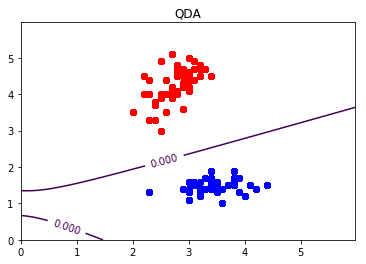